## Missing Values

### Assignment
In this assignment, you'll be working with the [U.S. Education Dataset](https://www.kaggle.com/noriuk/us-education-datasets-unification-project/home) from Kaggle. The data gives detailed state level information on several facets of the state of education on an annual basis. To learn more about the data and the column descriptions, click the Kaggle link above.

Lets access this data from the Thinkful database using the following credentials:

In [134]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import psycopg2
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [28]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

In [31]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user, postgres_pw, postgres_host, postgres_port
                                                            ,postgres_db))

us_education = pd.read_sql_query('select * from useducation', con = engine)

In [32]:
engine.dispose()

In [33]:
us_education.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


1. Determine all the variable types and find the fraction of the missing values for each variable.

Lets run the following code to find the **types of the column variables**, the total number of rows and columns and and number of non-null values in the dataset.

In [34]:
us_education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

And to find the fraction of missing values for each variables;

In [81]:
us_education.isnull().sum()*100/us_education.isnull().count()

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                          17.627346
TOTAL_REVENUE                   14.209115
FEDERAL_REVENUE                 14.209115
STATE_REVENUE                   14.209115
LOCAL_REVENUE                   14.209115
TOTAL_EXPENDITURE               14.209115
INSTRUCTION_EXPENDITURE         14.209115
SUPPORT_SERVICES_EXPENDITURE    14.209115
OTHER_EXPENDITURE               17.627346
CAPITAL_OUTLAY_EXPENDITURE      14.209115
GRADES_PK_G                     11.595174
GRADES_KG_G                      8.847185
GRADES_4_G                       8.780161
GRADES_8_G                       8.780161
GRADES_12_G                      8.780161
GRADES_1_8_G                     8.780161
GRADES_9_12_G                    8.780161
GRADES_ALL_G                    11.595174
AVG_MATH_4_SCORE                64.075067
AVG_MATH_8_SCORE                64.343164
AVG_READING_4_SCORE             64

2. Notice that the data has a time dimension (year). For this assignment, forget about time and treat all the observations as if they're from the same year. Choose a strategy to deal with the missing values for each variables. For which variables would filling in the missing values with some value make sense? For which might tossing out the records entirely make sense?

For variables 'ENROLL' all the way throughtout the 'GRADES*' filling the missing values with some sensible value makes more sense while it it is very difficult to determine what to do with the 'AVE*' variables because of the extremely high number of missing values,tossing out the whole variables make more sense to me.<br/>
Lets fill null with the mean of the variable assuming the data is for one year

In [114]:
sub_us_education0 = us_education[['YEAR','ENROLL','TOTAL_REVENUE','FEDERAL_REVENUE','STATE_REVENUE','LOCAL_REVENUE'
                   ,'TOTAL_EXPENDITURE','INSTRUCTION_EXPENDITURE','SUPPORT_SERVICES_EXPENDITURE','OTHER_EXPENDITURE'
                   ,'CAPITAL_OUTLAY_EXPENDITURE',"GRADES_PK_G"
                   , "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G"
                   , "GRADES_9_12_G", "GRADES_ALL_G"]]
sub_us_education0.fillna(sub_us_education0.mean(), inplace = True)
sub_us_education0.head()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G
0,1992,915930.820993,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,429204.616762,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0
1,1992,915930.820993,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,429204.616762,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0
2,1992,915930.820993,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,429204.616762,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0
3,1992,915930.820993,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,429204.616762,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0
4,1992,915930.820993,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,429204.616762,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0


3. Now, take into account the time factor. Replicate your second answer but this time fill in the missing values by using a statistic that is calculated within the year of the observation. For example, if you want to fill a missing value for a variable with the mean of that variable, calculate the mean by using only the observations for that specific year.

In [116]:
sub_us_education = us_education[['YEAR','ENROLL','TOTAL_REVENUE','FEDERAL_REVENUE','STATE_REVENUE','LOCAL_REVENUE'
                   ,'TOTAL_EXPENDITURE','INSTRUCTION_EXPENDITURE','SUPPORT_SERVICES_EXPENDITURE','OTHER_EXPENDITURE'
                   ,'CAPITAL_OUTLAY_EXPENDITURE',"GRADES_PK_G"
                   , "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G"
                   , "GRADES_9_12_G", "GRADES_ALL_G"]]
for year in sub_us_education['YEAR'].unique():
    sub_us_education[sub_us_education['YEAR'] == year].fillna(sub_us_education[sub_us_education['YEAR'] == year].mean()
                                                              ,inplace = True)
sub_us_education.head()    

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G
0,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,NaN,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0
1,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,NaN,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0
2,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,NaN,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0
3,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,NaN,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0
4,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,NaN,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0


4. This time, fill in the missing values using interpolation (extrapolation).

In [132]:
sub_us_education1 = us_education[['YEAR','ENROLL','TOTAL_REVENUE','FEDERAL_REVENUE','STATE_REVENUE','LOCAL_REVENUE'
                   ,'TOTAL_EXPENDITURE','INSTRUCTION_EXPENDITURE','SUPPORT_SERVICES_EXPENDITURE','OTHER_EXPENDITURE'
                   ,'CAPITAL_OUTLAY_EXPENDITURE',"GRADES_PK_G"
                   , "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G"
                   , "GRADES_9_12_G", "GRADES_ALL_G"]]
sub_us_education1.interpolate(inplace = True)
sub_us_education1.head()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G
0,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,NaN,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0
1,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,NaN,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0
2,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,NaN,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0
3,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,NaN,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0
4,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,NaN,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0


5. Compare your results for the 2nd, 3rd, and 4th questions. Do you find any meaningful differences?

Lets statistically compare the difference in the data by putting the statistical description of the variables side by side.

In [133]:
columns = ['ENROLL','TOTAL_REVENUE','FEDERAL_REVENUE','STATE_REVENUE','LOCAL_REVENUE'
                   ,'TOTAL_EXPENDITURE','INSTRUCTION_EXPENDITURE','SUPPORT_SERVICES_EXPENDITURE','OTHER_EXPENDITURE'
                   ,'CAPITAL_OUTLAY_EXPENDITURE',"GRADES_PK_G"
                   , "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G"
                   , "GRADES_9_12_G", "GRADES_ALL_G"]
for column in columns:
    print("Statistical description for the variables or columns: {}".format(column))
    print(pd.concat([us_education[column], sub_us_education0[column],
                     sub_us_education[column], sub_us_education1[column]], axis=1).describe())

Statistical description for the variables or columns: ENROLL
             ENROLL        ENROLL        ENROLL        ENROLL
count  1.229000e+03  1.492000e+03  1.229000e+03  1.456000e+03
mean   9.159308e+05  9.159308e+05  9.159308e+05  1.005984e+06
std    1.065280e+06  9.667725e+05  1.065280e+06  1.009158e+06
min    4.386600e+04  4.386600e+04  4.386600e+04  4.386600e+04
25%    2.583140e+05  3.150940e+05  2.583140e+05  2.973995e+05
50%    6.483130e+05  8.204140e+05  6.483130e+05  7.540845e+05
75%    1.014528e+06  9.211780e+05  1.014528e+06  1.595024e+06
max    6.307022e+06  6.307022e+06  6.307022e+06  6.307022e+06
Statistical description for the variables or columns: TOTAL_REVENUE
       TOTAL_REVENUE  TOTAL_REVENUE  TOTAL_REVENUE  TOTAL_REVENUE
count   1.280000e+03   1.492000e+03   1.280000e+03   1.492000e+03
mean    9.092082e+06   9.092082e+06   9.092082e+06   1.111164e+07
std     1.174519e+07   1.087818e+07   1.174519e+07   1.200155e+07
min     4.656500e+05   4.656500e+05   4.656500e+0

       GRADES_9_12_G  GRADES_9_12_G  GRADES_9_12_G  GRADES_9_12_G
count   1.361000e+03   1.492000e+03   1.361000e+03   1.492000e+03
mean    2.470714e+05   2.470714e+05   2.470714e+05   2.286678e+05
std     3.077056e+05   2.938773e+05   3.077056e+05   3.005815e+05
min     1.808000e+03   1.808000e+03   1.808000e+03   1.808000e+03
25%     5.147100e+04   5.919750e+04   5.147100e+04   3.950675e+04
50%     1.642600e+05   1.817010e+05   1.642600e+05   1.472355e+05
75%     2.905020e+05   2.825390e+05   2.905020e+05   2.843505e+05
max     2.013687e+06   2.013687e+06   2.013687e+06   2.013687e+06
Statistical description for the variables or columns: GRADES_ALL_G
       GRADES_ALL_G  GRADES_ALL_G  GRADES_ALL_G  GRADES_ALL_G
count  1.319000e+03  1.492000e+03  1.319000e+03  1.492000e+03
mean   8.024415e+05  8.024415e+05  8.024415e+05  7.478782e+05
std    9.707031e+05  9.126522e+05  9.707031e+05  9.291585e+05
min    7.254000e+03  7.254000e+03  7.254000e+03  7.254000e+03
25%    1.810650e+05  2.293578

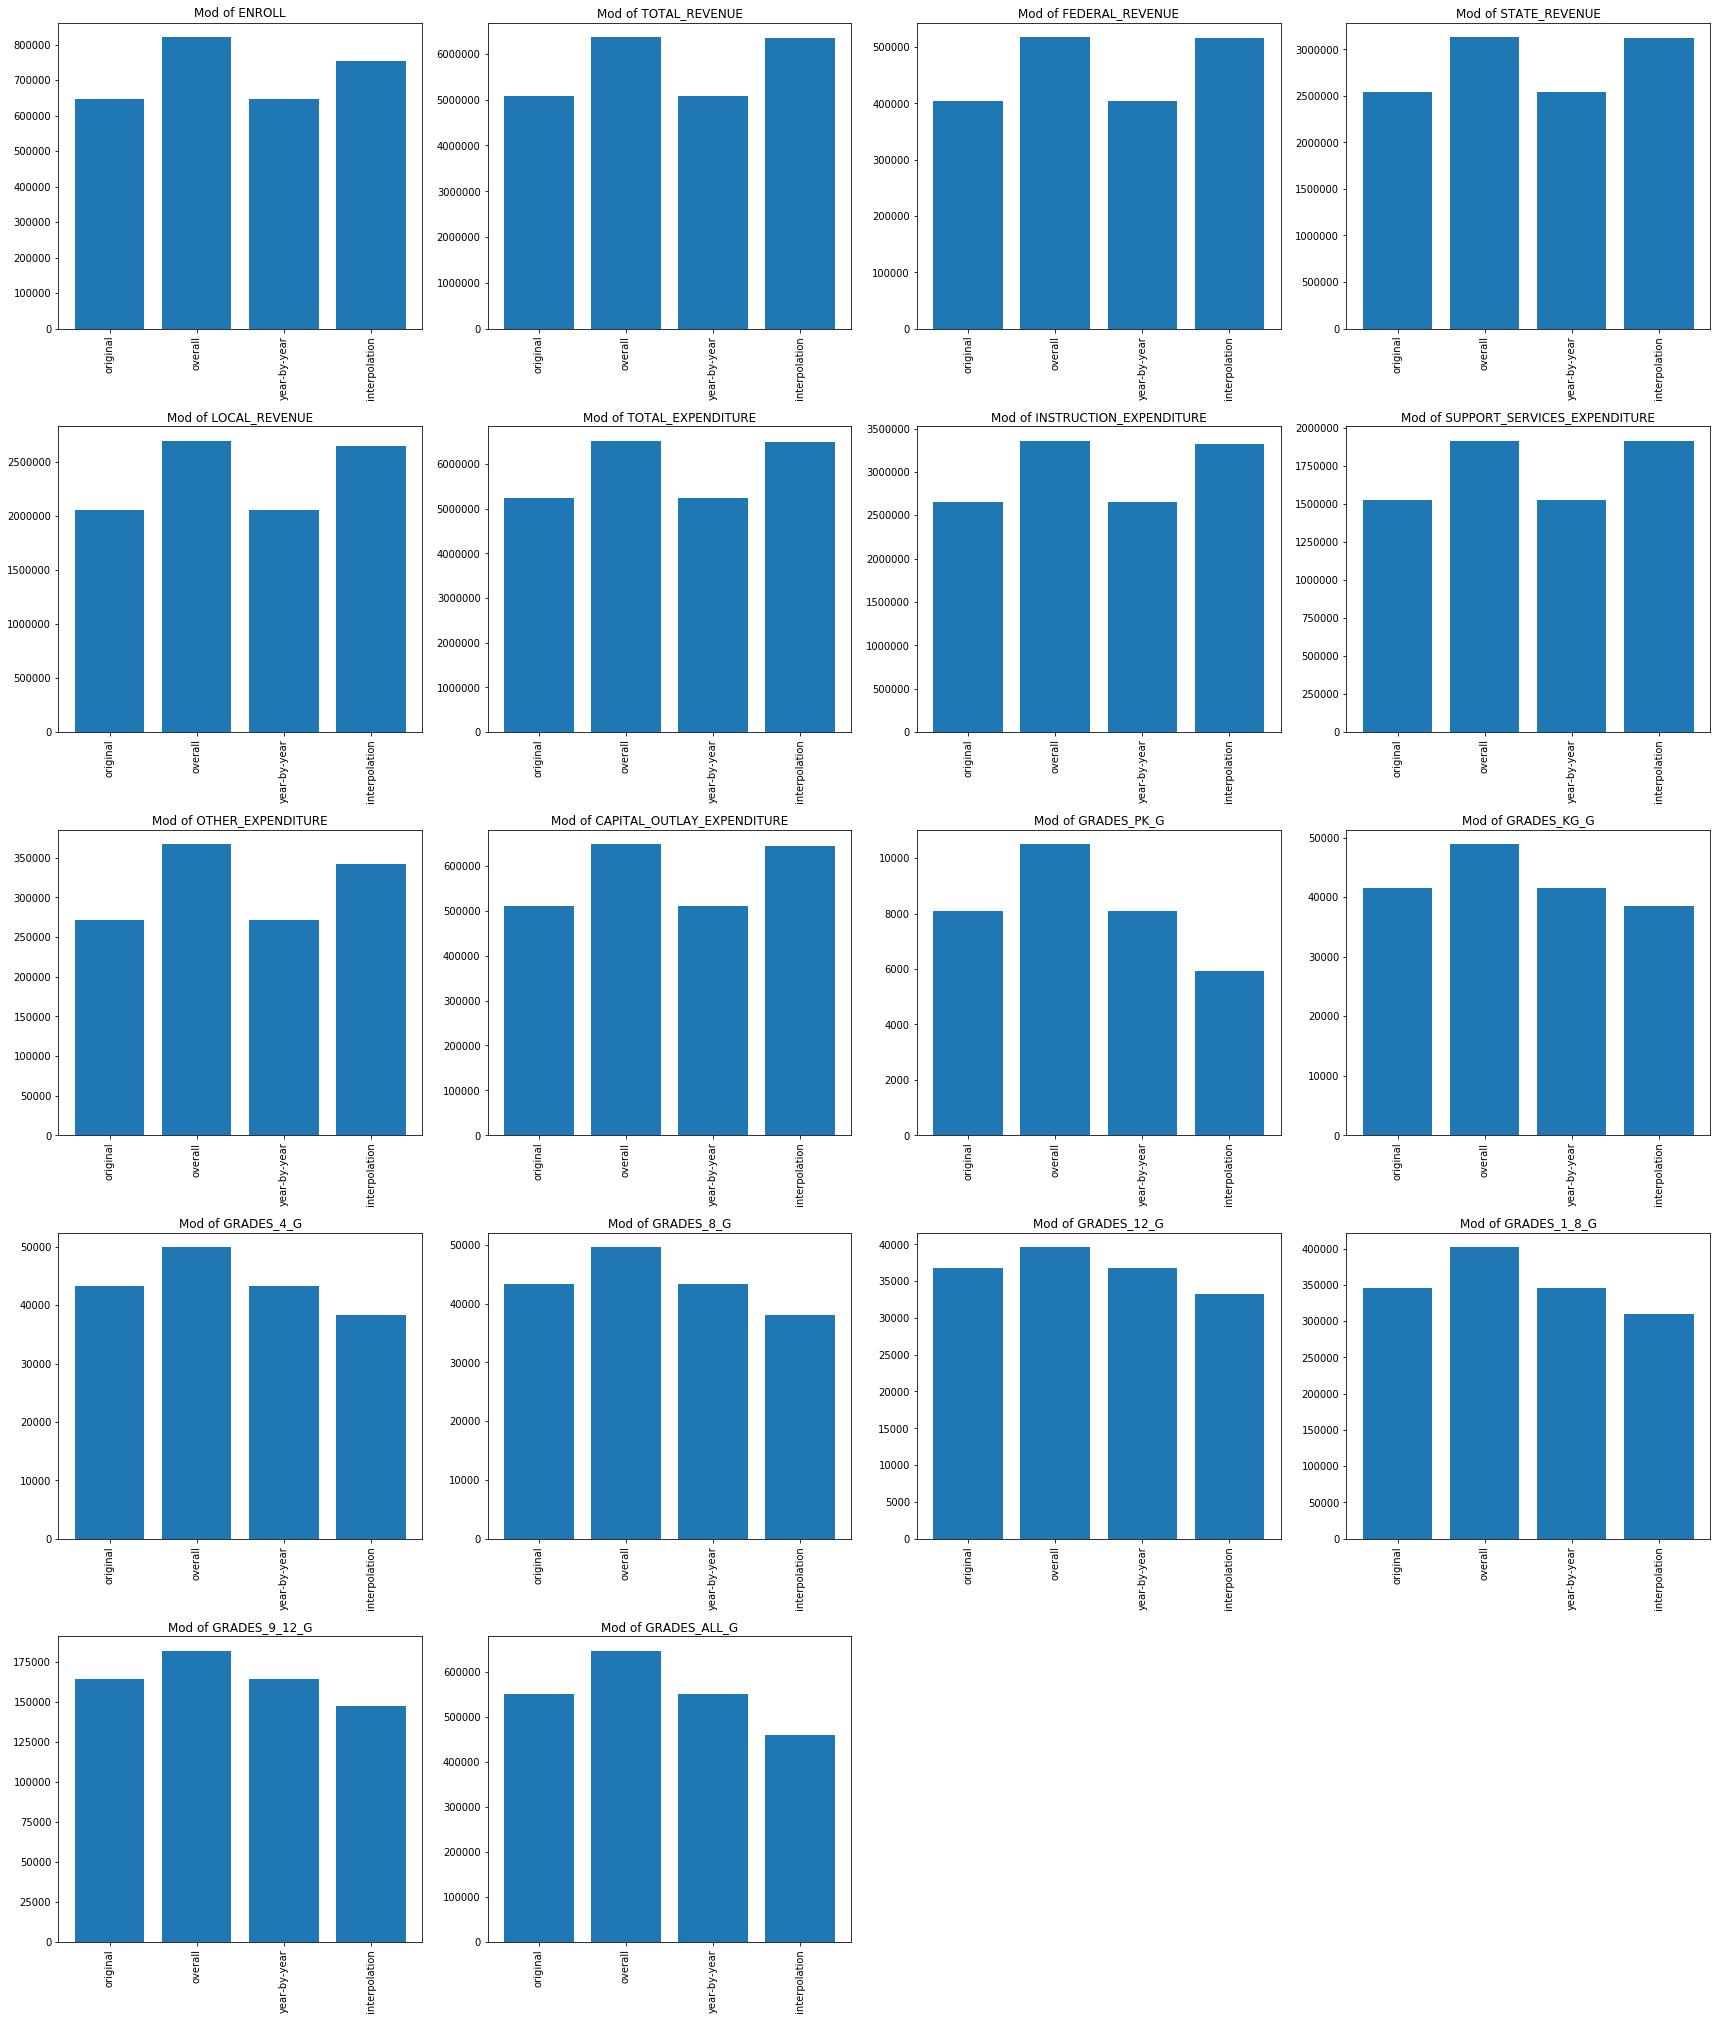

In [135]:
fig = plt.figure(figsize=(24,100))

for i, col in enumerate(columns):
    df = pd.concat([us_education[col], sub_us_education0[col],
                     sub_us_education[col], sub_us_education1[col]], axis=1)
    
    plt.subplot(len(fill_list), 4, i+1)
    plt.bar(["original", "overall", "year-by-year", "interpolation"], df.median())
    plt.xticks(rotation='vertical')
    plt.title("Mod of {}".format(col))
    
plt.tight_layout();